In [1]:
import keras
keras.__version__

/home/anirban/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2588 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.1047 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0699 - acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0503 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0375 - acc: 0.9885


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9774


[[1.9509510e-14 1.8769444e-07 9.7968662e-01 2.0312311e-02 7.2013982e-28
  7.8908741e-11 1.3608009e-19 1.1133176e-11 7.9575284e-07 1.6768327e-16]]
2


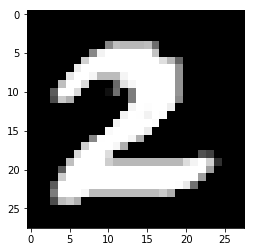

In [22]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input 
import numpy as np
import matplotlib.pyplot as plt
#temp_img=image.load_img("/home/anirban/mnist/train-images/"+"4"+".jpg",grayscale=True,target_size=(28,28)) 
temp_img=image.load_img("/home/anirban/Downloads/digit2.png",grayscale=True,target_size=(28,28)) 


temp_img=image.img_to_array(temp_img)
train_img=temp_img
#converting train images to array and applying mean subtraction processing
train_img=np.array(train_img)
train_img = train_img.reshape((1, 28 * 28)) 
train_img = train_img.astype('float32') / 255
#train_img=preprocess_input(train_img) print(train_img.shape) 
lab = network.predict(train_img) 
print(lab) 
print(np.argmax(lab))


img = image.load_img("/home/anirban/Downloads/digit2.png", target_size=(28, 28))
plt.imshow(img)